# 4.3 Zufallszahlen

In diesem Kapitel werden wir uns mit der Erzeugung und Anwendung von
Zufallszahlen in Python beschäftigen. Wir nutzen dazu das Modul `numpy.random`
aus der Bibliothek NumPy.

## Lernziele

```{admonition} Lernziele
:class: goals
* Sie kennen das Modul `numpy.random`.
* Sie können mit `.randint()` **gleichverteilte Integers** und mit `.uniform()`
  **gleichverteilte Floats** erzeugen lassen.
* Sie können mit `.normal()` **normalverteilte Floats** zu einem vorgegebenen
  Mittelwert und einer vorgegebenen Standabweichung erzeugen lassen.
* Sie kennen den Unterschied zwischen gleichverteilten und
  normalverteilten Zufallszahlen.
```

## Gleichverteilte Zufallszahlen

Beim Würfeln mit einem sechseitigen Würfel (W6) hat jede Augenzahl von 1 bis 6
die gleiche Wahrscheinlichkeit von 1/6. Wenn wir mit Python einen solchen Würfel
simulieren möchten, können wir die Funktion `randint()` aus dem Modul
`numpy.random` verwenden. Dazu müssen wir zunächst NumPy importieren.

In [1]:
import numpy as np

wuerfelwurf = np.random.randint(1, 7)
print(wuerfelwurf)

4


Die Funktion `randint()` kann nicht ohne Argumente aufgerufen werden, denn wir
müssen den Bereich vorschreiben, aus dem die gleichverteilten Zufallszahlen
gezogen werden sollen. Der Bereich wird durch das erste und zweite Argument der
Funktion gebildet, wobei das erste Argument inklusive ist und das zweite
Argument exklusive. Da das erste Argument inklusiv ist, geben wir hier die `1`
an. Dahingegen müssen wir als zweites Argument die `7` übergeben, um
gleichverteilte Zufallszahlen bis `6` zu bekommen, da das zweite Argument
exklusiv ist.

Wir können auch ein drittes Argument übergeben, das die Anzahl der gezogenen
Zufallszahlen steuert. Mit dem folgenden Code werden beispielsweise 10
gleichverteilte Integers zwischen 1 und 6 zufällig gezogen.

In [2]:
wuerfelwurfe = np.random.randint(1, 7, 10)
print(wuerfelwurfe)

[3 3 6 1 4 1 4 3 4 1]


Probieren wir das neu erlernte Wissen in einer Mini-Übung aus.

```{admonition} Mini-Übung
:class: miniexercise
Lassen Sie sechs Lottozahlen erzeugen, d.h. sechs Integer, die zwischen 1 und 49
gleichmäßig verteilt sind. Die Lottozahlen sollen auch ausgegeben werden.

Könnte damit die Ziehung der Lottozahlen simuliert werden?
```

In [3]:
# Hier Ihr Code

````{admonition} Lösung
:class: minisolution, toggle
```python
import numpy as np

# Erzeugung der Lottozahlen
lottozahlen = np.random.randint(1, 50, 6)

# Ausgabe
print(lottozahlen)
```
Eine Simulation der Ziehung der Lottozahlen ist damit nicht möglich. Bei der
echten Ziehung darf jede Zahl nur einmal vorkommen, dies gewährleistet der obige
Code nicht.
````

Sollen gleichverteilte Floats erzeugt werden, nutzen wir die Funktion
`.uniform()`, die ebenfalls im Modul `numpy.random` enthalten ist. Hier können
wir scheinbar auf die Angabe eines Bereichs verzichten.

In [4]:
zufallszahl = np.random.uniform()
print(zufallszahl)

0.16535472399117768


Wenn wir die obige Code-Zelle mehrfach ausführen, stellen wir fest, dass die
gleichverteilten Floats zwischen 0 und 1 liegen. Etwas präziser formuliert
liegen die Zufallszahlen in dem halboffenen Intervall $[0, 1)$. Wir können auch
hier das Intervall vorschreiben, indem wir die linke Intervallgrenze als erstes
Argument (inklusiv) übergeben und die rechte Intervallgrenze als zweites
Argument (exklusiv).

In [5]:
zufallszahl = np.random.uniform(-5.2, 3.0)
print(zufallszahl)

-3.5732079768492655


Mit Hilfe des dritten Argumentes können wir mehreren Zufallszahlen gleichzeitig
erzeugen lassen.

In [6]:
zufallszahlen = np.random.uniform(10, 20, 5)
print(zufallszahlen)

[12.17957638 14.15688944 16.51583067 16.81621929 15.88478914]


Damit werden fünf gleichverteilte Zufallszahlen zwischen 10 und 20 (exklusiv)
generiert.

Wir wollen nun analysieren, ob die Zufallszahlen wirklich gleichmäßig aus dem
Intervall $[10, 20)$ stammen. Dazu lassen wir 1000 gleichverteilte Zufallszahlen
generieren. Danach teilen wir das Intervall in 10 Abschnitte und lassen nun von
$[10, 11)$, $[11, 12)$, $[12, 13)$ usw. bis $[19, 20)$ zählen, wie häufig eine
Zufallszahl aus diesem Teilintervall kommt. Dieses sogenannte Histogramm sieht
folgendermaßen aus (den Code brauchen Sie noch nicht verstehen, das kommt
später).

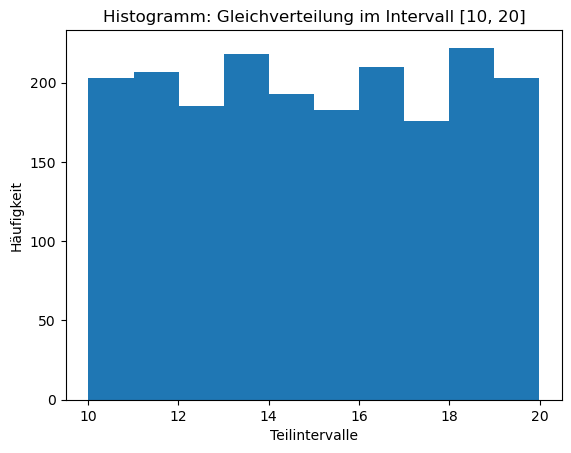

In [7]:
import matplotlib.pyplot as plt

zufallszahlen = np.random.uniform(10, 20, 2000)

plt.hist(zufallszahlen)
plt.title('Histogramm: Gleichverteilung im Intervall [10, 20]')
plt.xlabel('Teilintervalle')
plt.ylabel('Häufigkeit');

Ordnet man die gezogenen Zufallszahlen den 10 Teilintervallen zu, so sind in
jedem Teilintervall ungefähr 200 Zufallszahlen enthalten.

## Normalverteilte Zufallszahlen

Eine normalverteilte Zufallszahl folgt der sogenannten Normalverteilung oder
Gaußschen Verteilung. Das ist eine Wahrscheinlichkeitsverteilung, die durch ihr
Glockenkurven-Diagramm bekannt ist. Sie ist eine der wichtigsten Modelle in
Natur- und Ingenieurwissenschaften, da viele Messgrößen (z. B. Körpergröße,
Fertigungstoleranzen, Messfehler) näherungsweise normalverteilt sind.

Die Normalverteilung wird durch zwei Parameter beschrieben: den Mittelwert (oder
Erwartungswert) und die Standardabweichung. Der Mittelwert ist der Wert, um den
die Werte im Durchschnitt zentriert sind. Die Standardabweichung ist ein Maß für
die Streuung der Werte.

In Python können wir mit der Funktion `numpy.random.normal()` normalverteilte
Zufallszahlen erzeugen:

In [8]:
zufallszahl = np.random.normal(0, 1)
print(zufallszahl)

0.8697075695289167


Das erste Argument `0` steht für einen Mittelwert von 0. Das zweite Argument `1`
bedeutet, dass die Normalverteiung eine Standardabweichung von 1 hat.

Wir können auch mehrere Zahlen gleichzeitig erzeugen:

In [9]:
zufallszahlen = np.random.normal(0, 1, 5)
print(zufallszahlen)

[ 7.62028015e-01  8.78469954e-01 -2.82500150e-04  8.21660905e-01
 -9.34938414e-01]


Jetzt wurden fünf normalverteilte Zufallszahlen erzeugt.

```{admonition} Mini-Übung
:class: miniexercise
Bei einer Schulklasse wird die Körpergröße der Jugendlichen (Alter: 14 bis 18
Jahre) gemessen. Der Mittelwert bei den Mädchen ist 166.3 cm (Standardabweichung
6.39 cm) und bei den Jungen 176.8 cm (Standardabweichung 7.46 cm) (Quelle:
[Wikipedia](https://de.wikipedia.org/wiki/Normalverteilung)).

Lassen Sie die Körpergrößen einer durchschnittlichen Schulklasse (= 13 Mädchen
und 13 Jungen) erzeugen und ausgeben.
```

In [10]:
# Hier Ihr Code

````{admonition} Lösung
:class: minisolution, toggle
```python
import numpy as np

# Erzeugung der Körpergrößen
maedchen = np.random.normal(166.3, 6.39, 13)
jungen = np.random.normal(176.8, 7.46, 13)

# Ausgabe
print(maedchen)
print(jungen)
```
````

Auch hier wollen wir visualisieren, wie die Häufigkeit der Zufallszahlen
verteilt ist. Dazu erzeugen wir 2000 normalverteilte Zufallszahlen mit
Mittelwert 0 und Standardabweichung 1, was standardnormalverteilt genannt wird.
Diesmal nehmen wir 10 automatische Teilintervalle, um die Häufigkeiten der
Zufallszahlen pro Teilintervall anzeigen zu lassen.

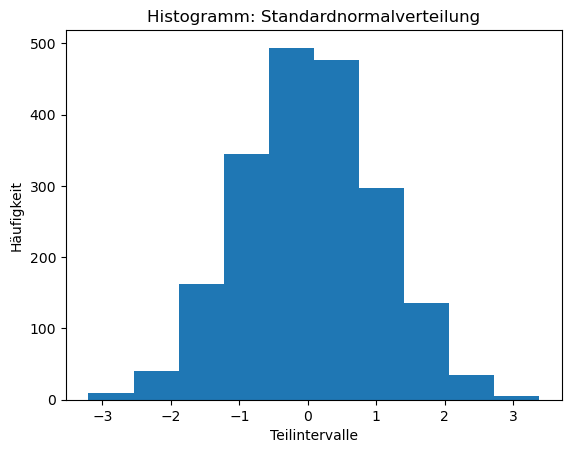

In [11]:
import matplotlib.pyplot as plt

zufallszahlen = np.random.normal(0, 1, 2000)

plt.hist(zufallszahlen)
plt.title('Histogramm: Standardnormalverteilung')
plt.xlabel('Teilintervalle')
plt.ylabel('Häufigkeit');

## Zusammenfassung und Ausblick

Mit den Zufallszahlen können wir Anwendungen des Alltags durch Python simulieren
lassen. Bevor wir sie einsetzen, müssen wir jedoch entscheiden, ob wir Integers
oder Floats benötigen und ob sie gleichverteilt oder normalverteilt sein sollen.
Das nächste Kapitel führt Kontrollstrukturen ein, um abhängig von einer
Bedingung Code auszuführen.